# Evaluate Distribution of Predicted Emotions

## Analyse General Emotion Distribution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ICP_CLASS_TO_ID = {"neu": 0, "hap": 1, "sad": 2, "fru": 3, "ang": 4}
ICP_ID_TO_CLASS = {v: k for k, v in ICP_CLASS_TO_ID.items()}

AIBO_CLASS_TO_ID = {'A': 0, 'E': 1, 'N': 2, 'P': 3, 'R': 4}
AIBO_ID_TO_CLASS = {v: k for k, v in AIBO_CLASS_TO_ID.items()}

Since 3-layer MLP performed the best compared to PyTorch 1-layer MLP or Random Forest from scikit-learn, we continue with it. 

In [44]:
pred_probas = np.load("results/three_layer_pred.npy")
#pred_probas = np.load("results/one_layer_pred.npy")
labels = np.load("results/y_test.npy")

In [45]:
#pred = np.argmax(pred_probas, axis=1)

In [46]:
# Map predictions to AIBO class names
pred_aibo = [AIBO_ID_TO_CLASS[int(p)] for p in pred_probas]

# Map true labels to ICP class names
labels_icp = [ICP_ID_TO_CLASS[labels[i]] for i in range(len(labels))]

In [47]:
df = pd.DataFrame(list(zip(labels_icp, pred_aibo)), columns=['labels_icp', 'pred_aibo'])

In [48]:
df.labels_icp.value_counts()

labels_icp
neu    10967
fru     3601
ang     1492
hap     1267
sad      889
Name: count, dtype: int64

In [49]:
df.pred_aibo.value_counts()

pred_aibo
E    10798
R     5611
P      915
A      498
N      394
Name: count, dtype: int64

In [50]:
def plot_emotion_mapping(df, emotion, gender=None):
    filt_df = df[df.labels_icp == emotion]

    if gender == 'fml':
        d = filt_df.pred_fml_aibo.value_counts().to_dict()
    elif gender == 'ml':
        d = filt_df.pred_ml_aibo.value_counts().to_dict()
    else:
        d = filt_df.pred_aibo.value_counts().to_dict()
        
    perc = [v * 100.0 / sum(d.values()) for v in d.values()]
    p = dict(zip(d.keys(), perc))

    plt.rcParams["figure.figsize"] = [10, 7]
    plt.rcParams["figure.autolayout"] = True
    x = list(d.keys())
    y = list(d.values())
    percentage = list(p.values())

    width = 0.35
    fig, ax = plt.subplots()
    pps = ax.bar(x, y, width, align='center', color='maroon')
    for i, patch in enumerate(ax.patches):
        ax.annotate('{:.1f}%'.format(
            percentage[i]), 
                    (patch.get_x() + patch.get_width() / 2, patch.get_height() + .05),
                    ha='center')

    plt.xlabel("AIBO Labels")
    plt.ylabel("Occurrences")
    if gender == 'fml' or gender == 'ml':
        plt.title("IEMOCAP_{} '{}' Emotion Label in AIBO label terms".format(gender, emotion))
        plt.savefig('results/icp_{}_matching_{}.svg'.format(gender, emotion), format='svg')
    else:
        plt.title("IEMOCAP '{}' Emotion Label in AIBO label terms".format(emotion))
        plt.savefig('results/icp_matching_{}.svg'.format(emotion), format='svg')
    plt.show()

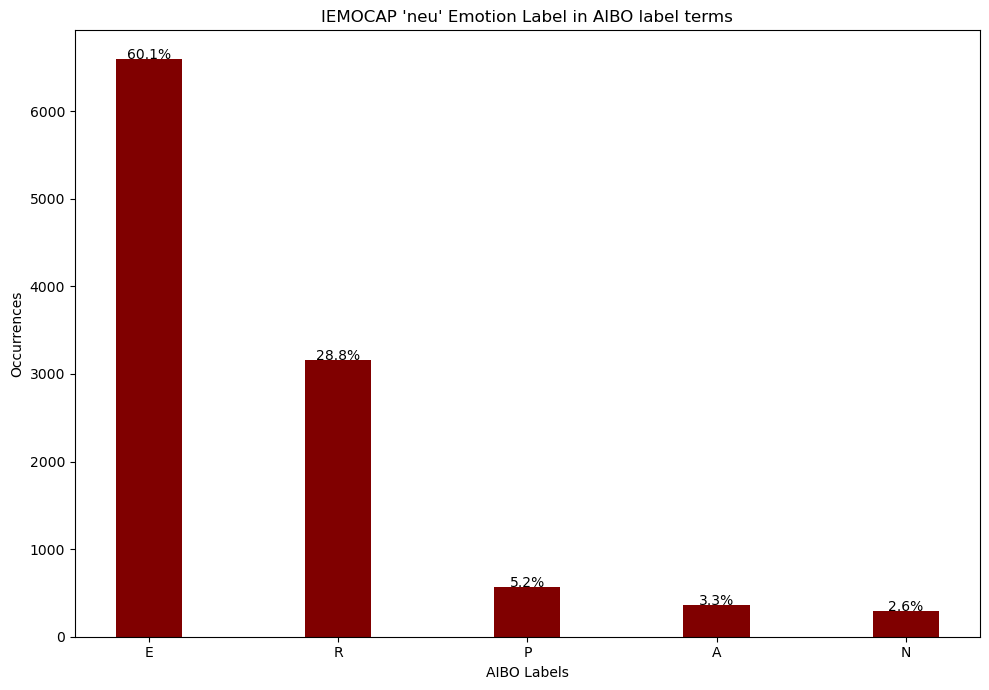

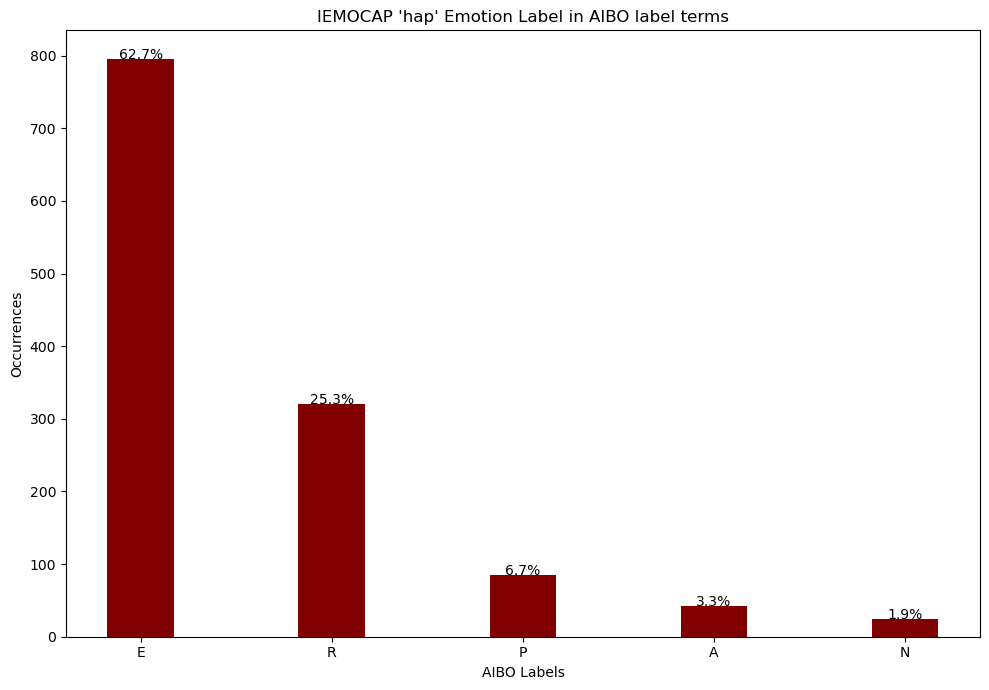

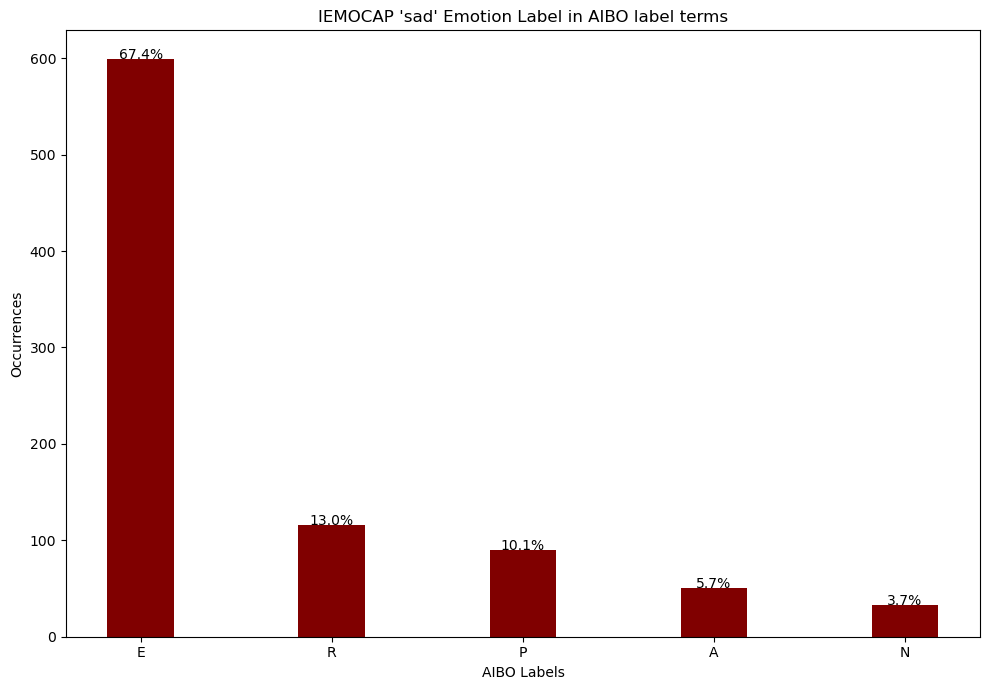

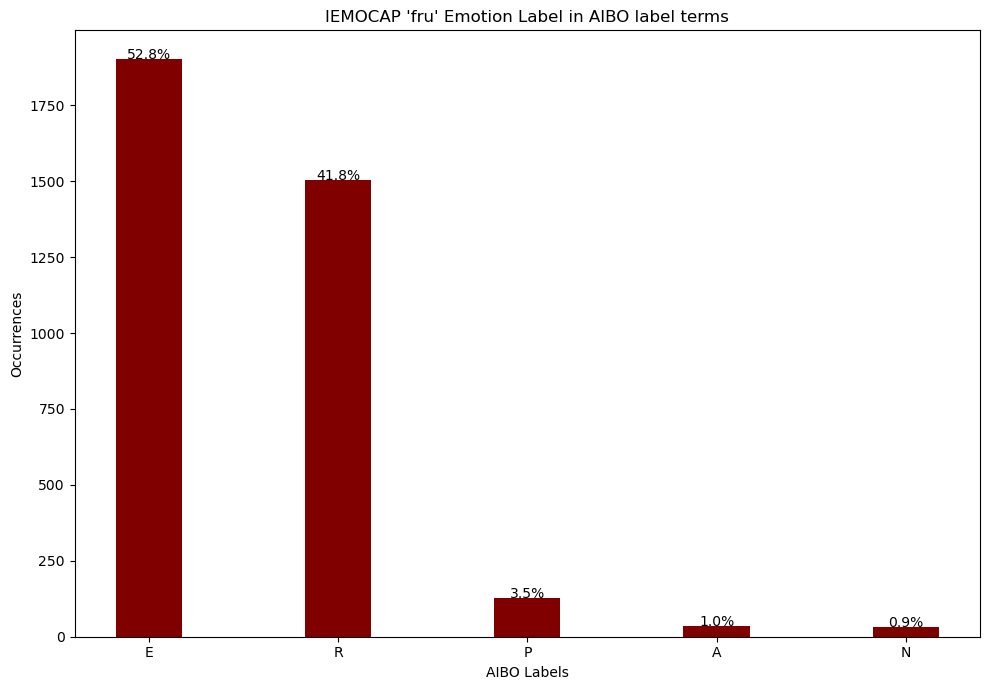

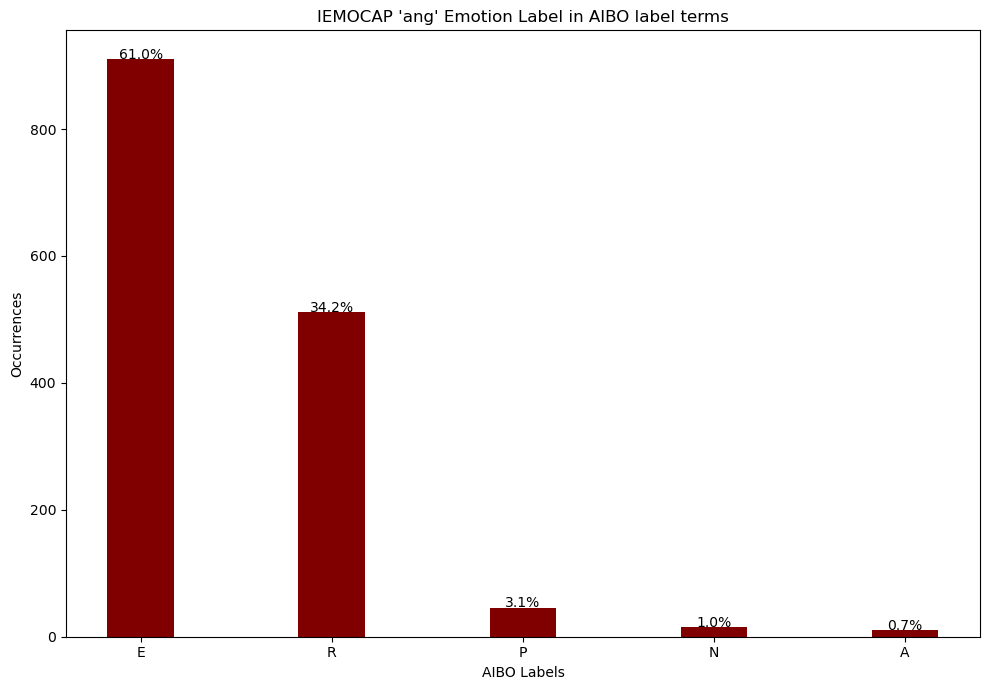

In [51]:
# Iterate over the keys of ICP_CLASS_TO_ID and call the function
for emotion in ICP_CLASS_TO_ID.keys():
    plot_emotion_mapping(df, emotion)

## Review Distribution Gender-wise

In [52]:
#pred_fml = np.argmax(np.load("results/three_layer_pred_fml.npy"), axis=1)
#pred_ml = np.argmax(np.load("results/three_layer_pred_ml.npy"), axis=1)
pred_fml = np.load("results/three_layer_pred_fml.npy")
pred_ml = np.load("results/three_layer_pred_ml.npy")

In [53]:
# Map predictions to AIBO class names
pred_fml_aibo = [AIBO_ID_TO_CLASS[int(p)] for p in pred_fml]
pred_ml_aibo = [AIBO_ID_TO_CLASS[int(p)] for p in pred_ml]

In [54]:
df_fml = pd.DataFrame(list(zip(labels_icp, pred_fml_aibo)), columns=['labels_icp', 'pred_fml_aibo'])
df_ml = pd.DataFrame(list(zip(labels_icp, pred_ml_aibo)), columns=['labels_icp', 'pred_ml_aibo'])

In [55]:
df_fml.pred_fml_aibo.value_counts()

pred_fml_aibo
E    17378
N      838
Name: count, dtype: int64

In [56]:
df_ml.pred_ml_aibo.value_counts()

pred_ml_aibo
A    16953
P     1261
R        2
Name: count, dtype: int64

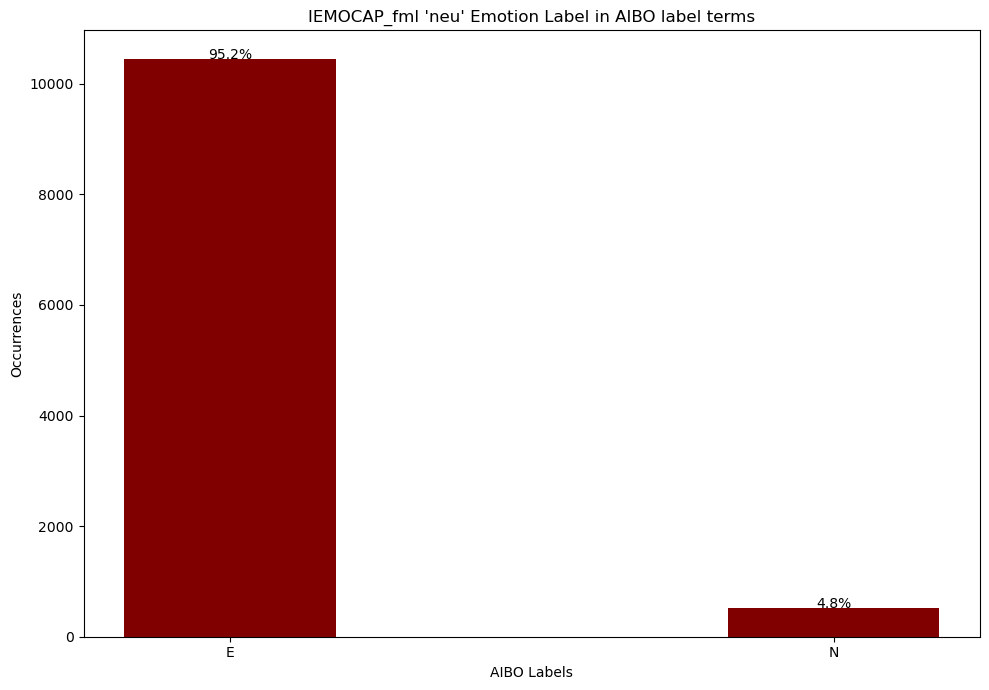

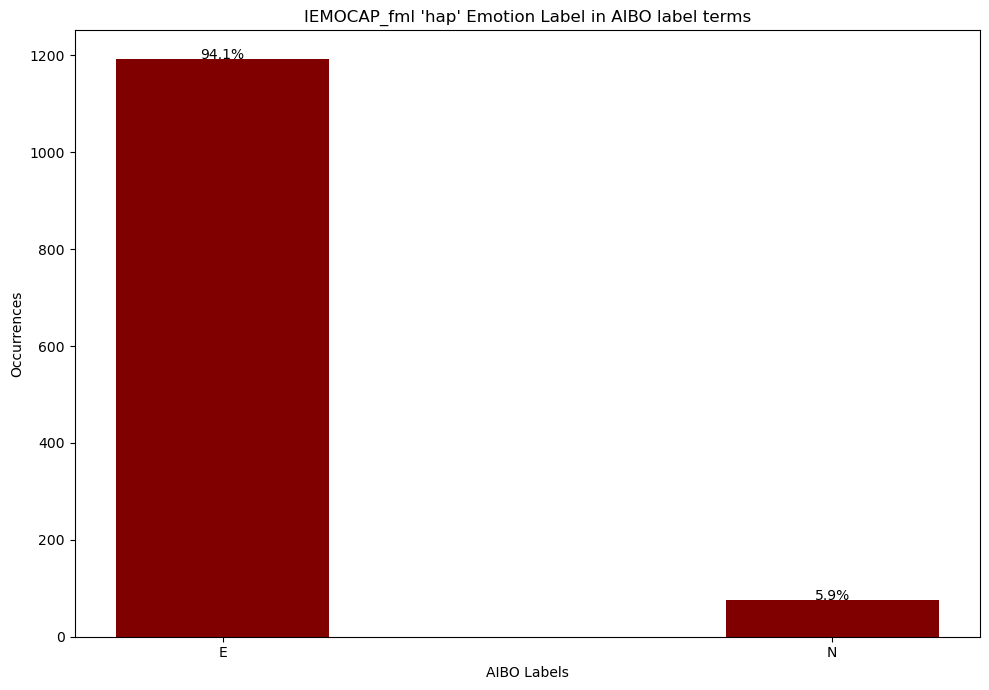

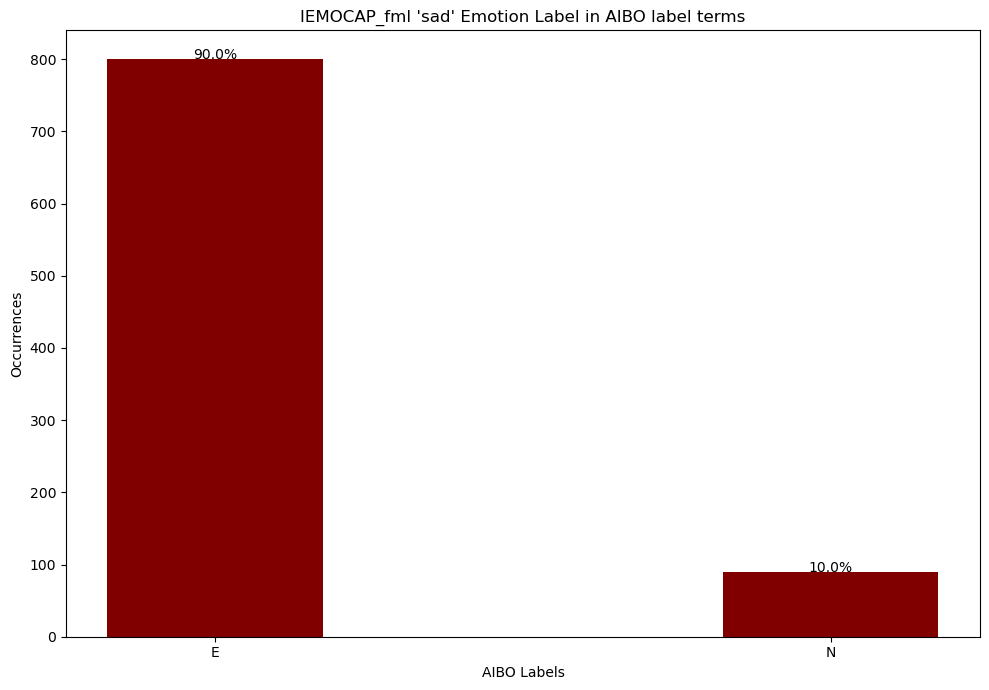

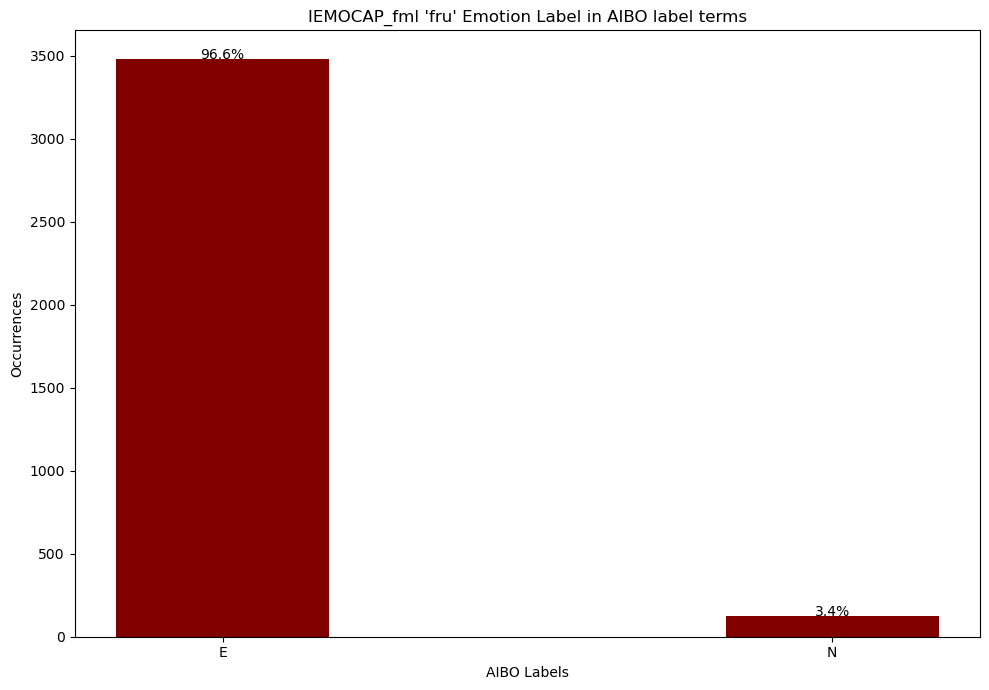

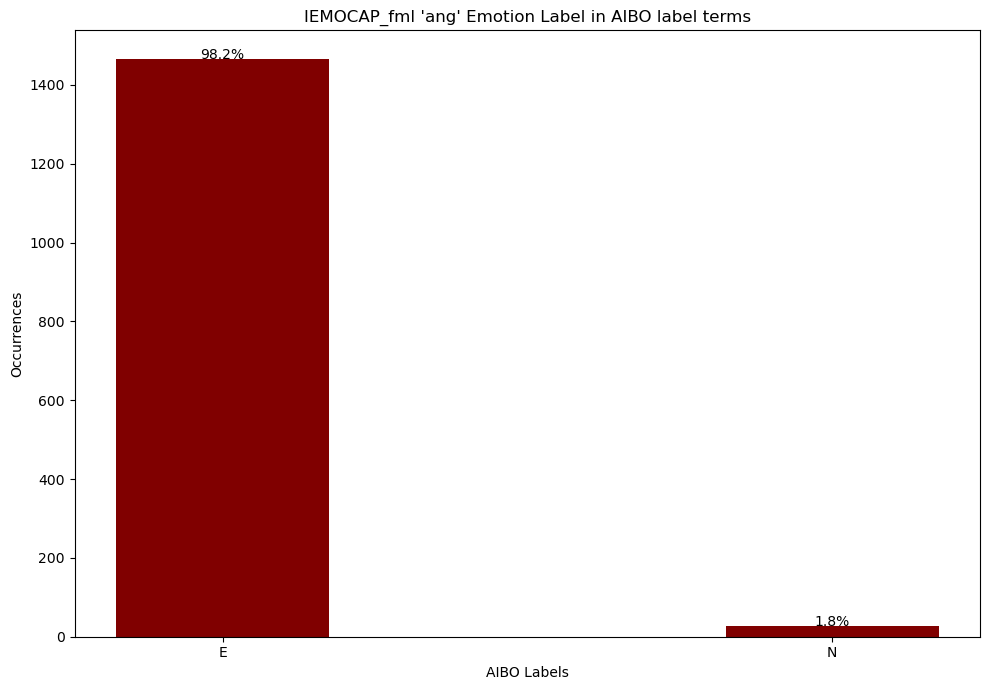

In [57]:
# Iterate over the keys of ICP_CLASS_TO_ID and call the function
for emotion in ICP_CLASS_TO_ID.keys():
    plot_emotion_mapping(df_fml, emotion, gender = 'fml')

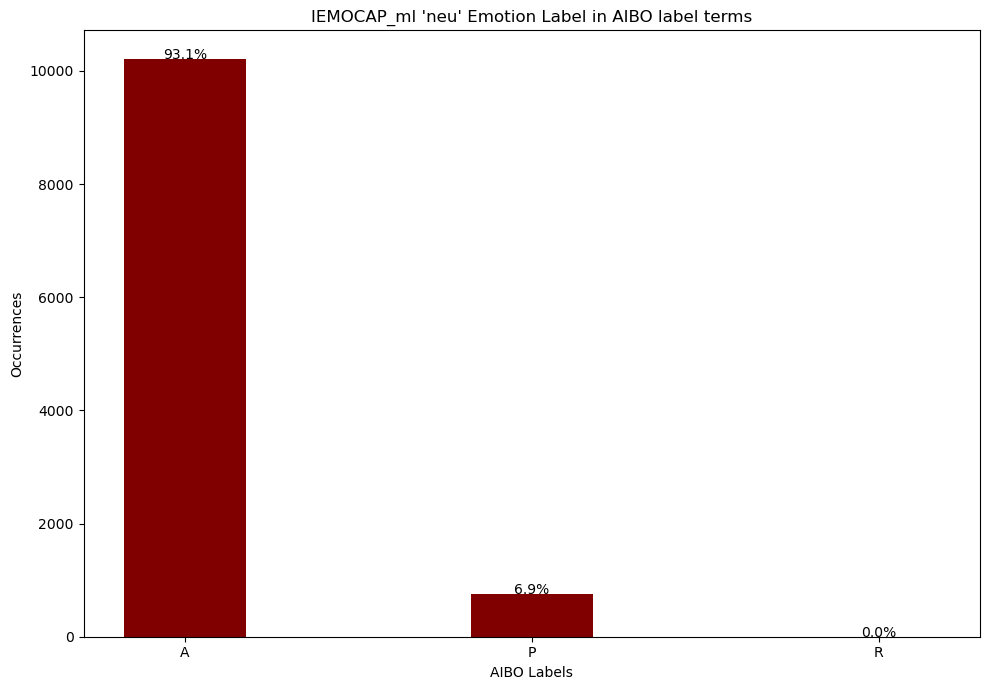

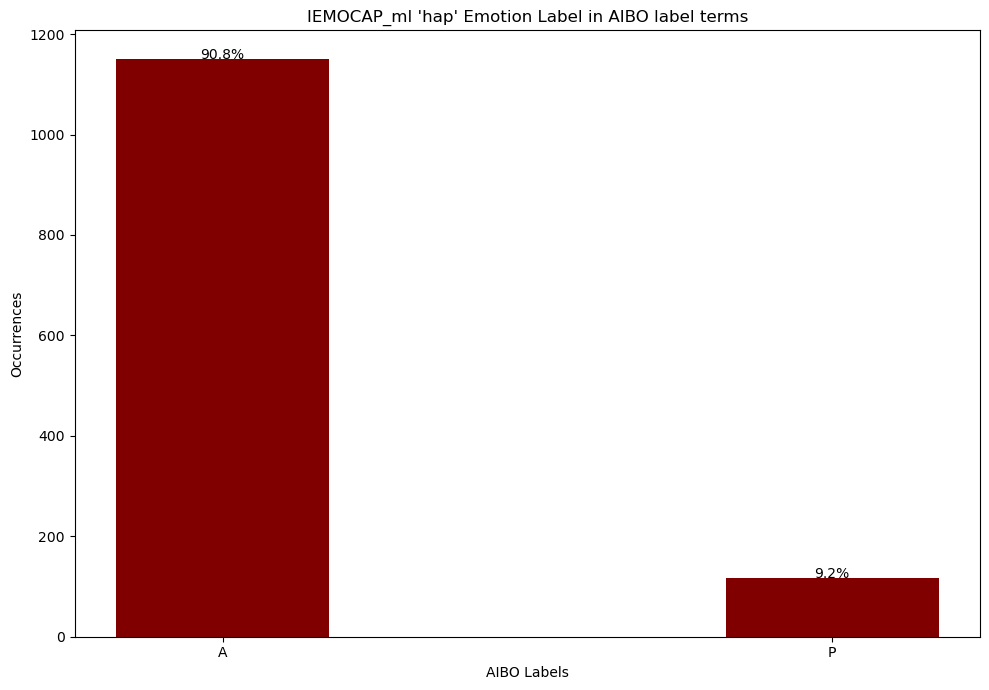

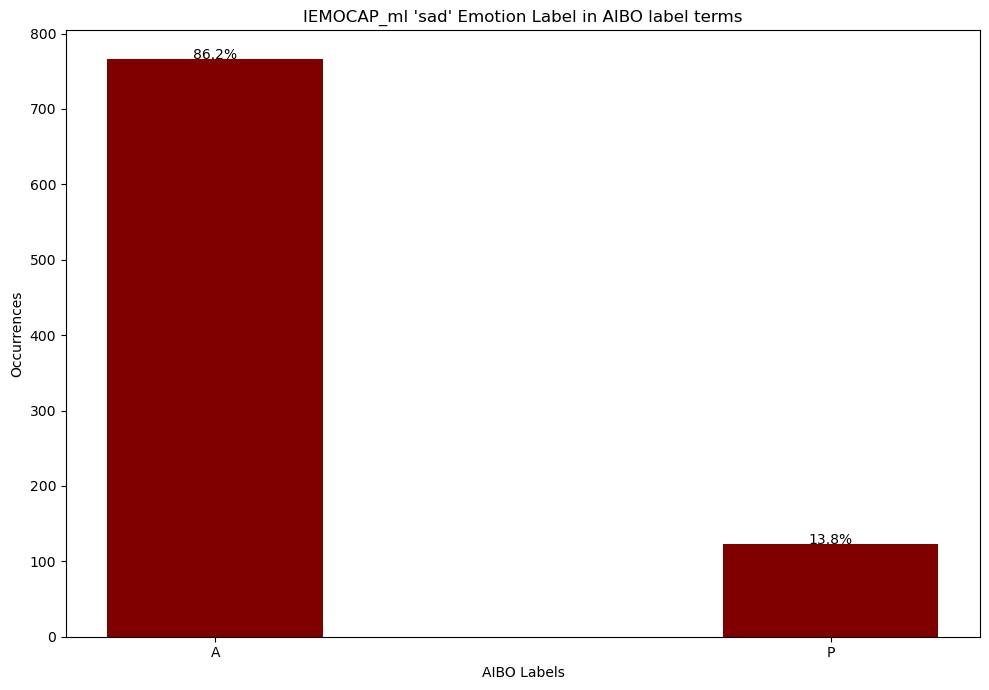

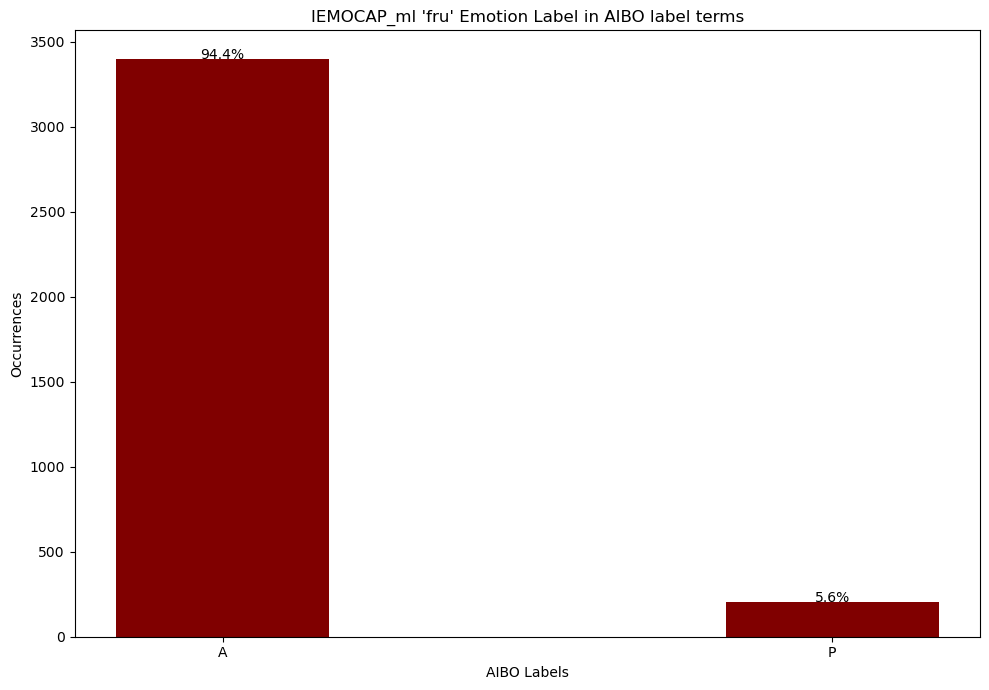

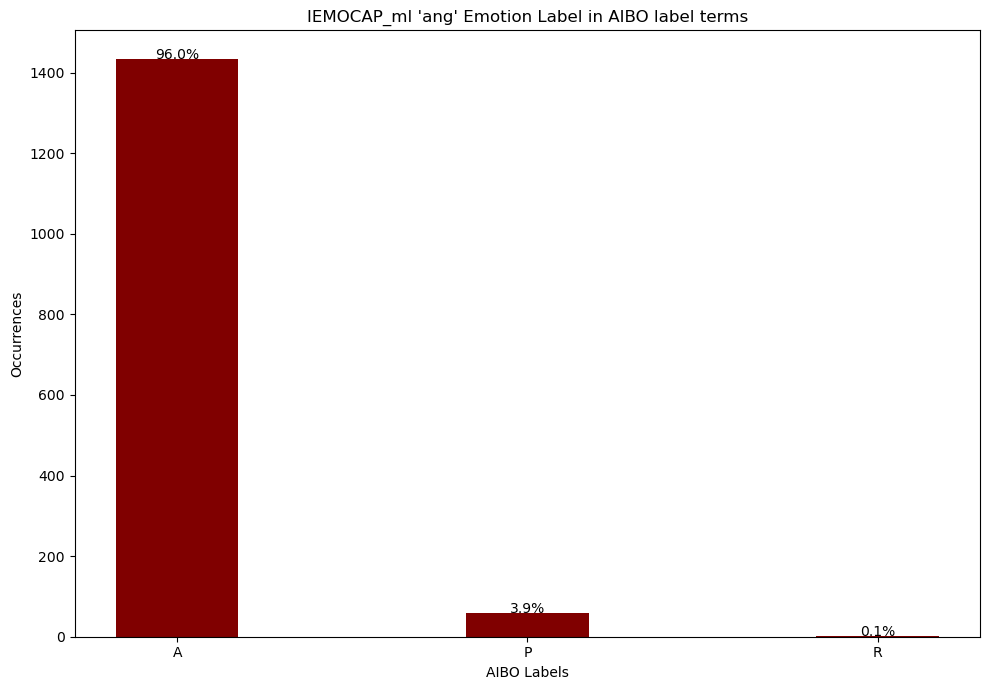

In [58]:
# Iterate over the keys of ICP_CLASS_TO_ID and call the function
for emotion in ICP_CLASS_TO_ID.keys():
    plot_emotion_mapping(df_ml, emotion, gender = 'ml')

## Review 3 datasets altogether

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_emotion_mapping_combined(df, df_ml, df_fml, emotion):
    # Filter the data
    filt_df = df[(df.labels_icp == emotion) & (df.pred_aibo != 'R')]
    filt_ml_df = df_ml[(df_ml.labels_icp == emotion) & (df_ml.pred_ml_aibo != 'R')]
    filt_fml_df = df_fml[(df_fml.labels_icp == emotion) & (df_fml.pred_fml_aibo != 'R')]

    # Get the value counts
    d = filt_df.pred_aibo.value_counts().to_dict()
    ml_d = filt_ml_df.pred_ml_aibo.value_counts().to_dict()
    fml_d = filt_fml_df.pred_fml_aibo.value_counts().to_dict()

    # Calculate total counts and percentages
    all_labels = list(set(d.keys()).union(set(ml_d.keys())).union(set(fml_d.keys())))
    total_counts = {label: d.get(label, 0) + ml_d.get(label, 0) + fml_d.get(label, 0) for label in all_labels}
    total_sum = sum(total_counts.values())
    perc = {label: total_counts[label] * 100.0 / total_sum for label in total_counts}

    # Prepare data for plotting
    labels = all_labels
    X = np.arange(len(labels))
    width = 0.2

    # Plotting
    fig, ax = plt.subplots()
    bars1 = ax.bar(X - width, [d.get(k, 0) for k in labels], width=width, color='darkred', align='center')
    bars2 = ax.bar(X, [ml_d.get(k, 0) for k in labels], width=width, color='salmon', align='center')
    bars3 = ax.bar(X + width, [fml_d.get(k, 0) for k in labels], width=width, color='pink', align='center')

    # Adding percentage annotations on bars
    for bar in bars1:
        height = bar.get_height()
        label = labels[int(bar.get_x() + bar.get_width() / 2)]
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{perc[label]:.1f}%', ha='center', va='bottom')

    for bar in bars2:
        height = bar.get_height()
        label = labels[int(bar.get_x())]
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{perc[label]:.1f}%', ha='center', va='bottom')

    for bar in bars3:
        height = bar.get_height()
        label = labels[int(bar.get_x() - bar.get_width() / 2)]
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{perc[label]:.1f}%', ha='center', va='bottom')

    # Adding legend and titles
    ax.legend(('Whole IEMOCAP', 'Male IEMOCAP', 'Female IEMOCAP'))
    plt.xticks(X, labels)
    plt.xlabel("AIBO Labels")
    plt.ylabel("Occurrences")
    plt.title(f"Gender-wise IEMOCAP '{emotion}' Emotion Label in AIBO label terms")
    plt.savefig(f'results/genderwise_icp_matching_{emotion}.svg', format='svg')
    plt.show()

    # Creating and printing the table
    data = {
        'Label': labels,
        'Whole IEMOCAP Count': [d.get(k, 0) for k in labels],
        'Male IEMOCAP Count': [ml_d.get(k, 0) for k in labels],
        'Female IEMOCAP Count': [fml_d.get(k, 0) for k in labels],
        'Percentage': [perc[k] for k in labels]
    }
    table_df = pd.DataFrame(data)
    print(table_df)
    return table_df

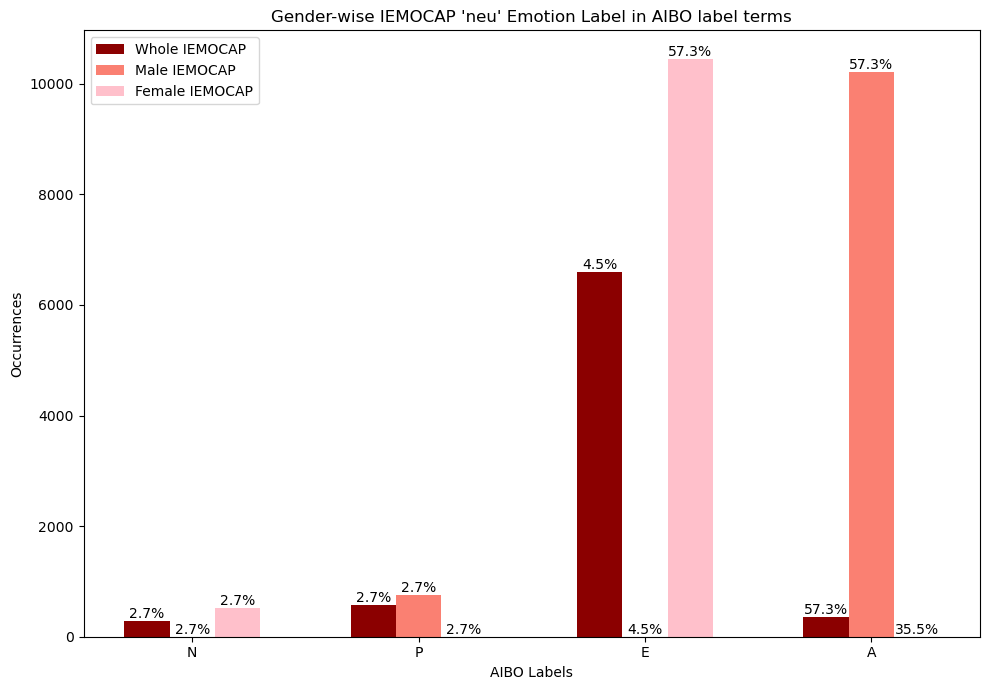

  Label  Whole IEMOCAP Count  Male IEMOCAP Count  Female IEMOCAP Count  \
0     N                  290                   0                   524   
1     P                  567                 760                     0   
2     E                 6592                   0                 10443   
3     A                  359               10206                     0   

   Percentage  
0    2.736962  
1    4.461854  
2   57.277832  
3   35.523352  


In [65]:
emotion = 'neu'
table_df = plot_emotion_mapping_combined(df, df_ml, df_fml, emotion)

csv_file_path = f'results/emotion_mapping_{emotion}.csv'
table_df.to_csv(csv_file_path, index=False)

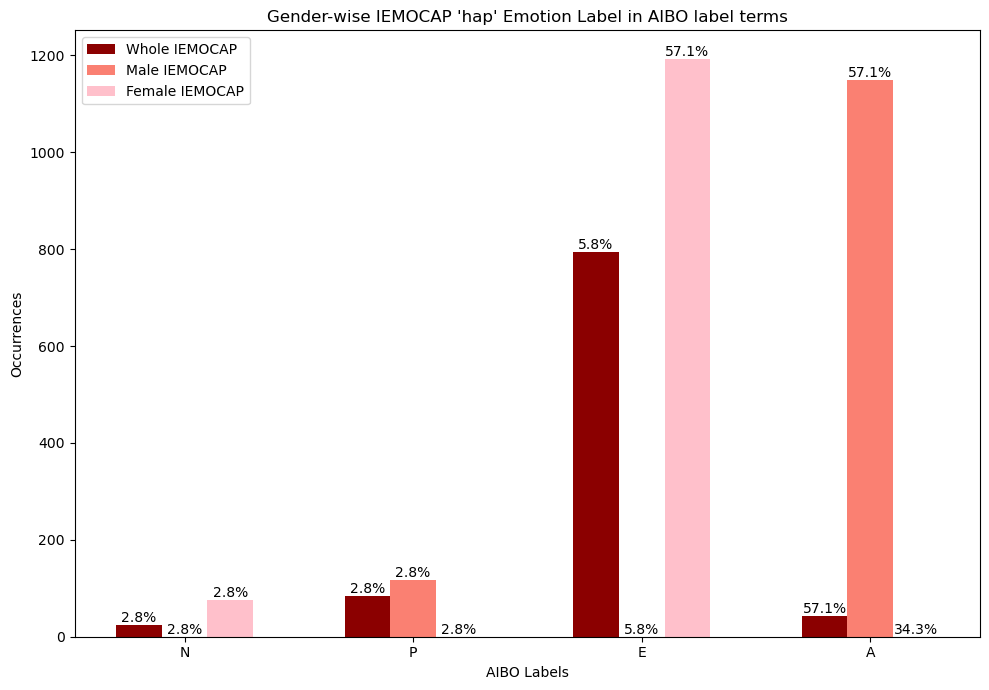

  Label  Whole IEMOCAP Count  Male IEMOCAP Count  Female IEMOCAP Count  \
0     N                   24                   0                    75   
1     P                   85                 117                     0   
2     E                  795                   0                  1192   
3     A                   42                1150                     0   

   Percentage  
0    2.844828  
1    5.804598  
2   57.097701  
3   34.252874  


In [66]:
emotion = 'hap'
table_df = plot_emotion_mapping_combined(df, df_ml, df_fml, emotion)

csv_file_path = f'results/emotion_mapping_{emotion}.csv'
table_df.to_csv(csv_file_path, index=False)

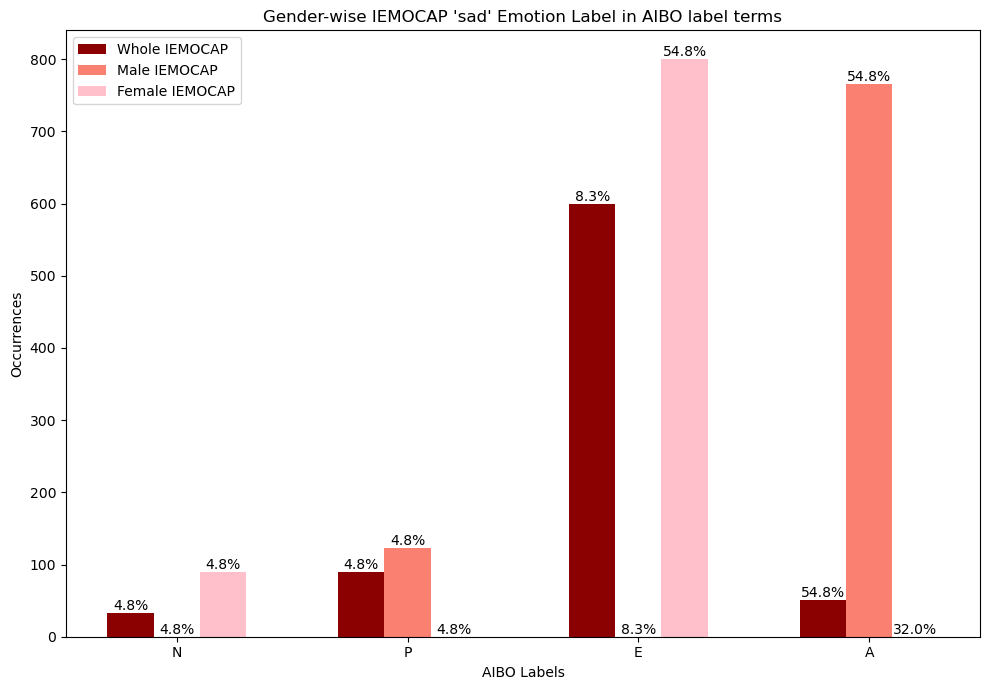

  Label  Whole IEMOCAP Count  Male IEMOCAP Count  Female IEMOCAP Count  \
0     N                   33                   0                    89   
1     P                   90                 123                     0   
2     E                  599                   0                   800   
3     A                   51                 766                     0   

   Percentage  
0    4.782438  
1    8.349667  
2   54.841239  
3   32.026656  


In [67]:
emotion = 'sad'
table_df = plot_emotion_mapping_combined(df, df_ml, df_fml, emotion)

csv_file_path = f'results/emotion_mapping_{emotion}.csv'
table_df.to_csv(csv_file_path, index=False)

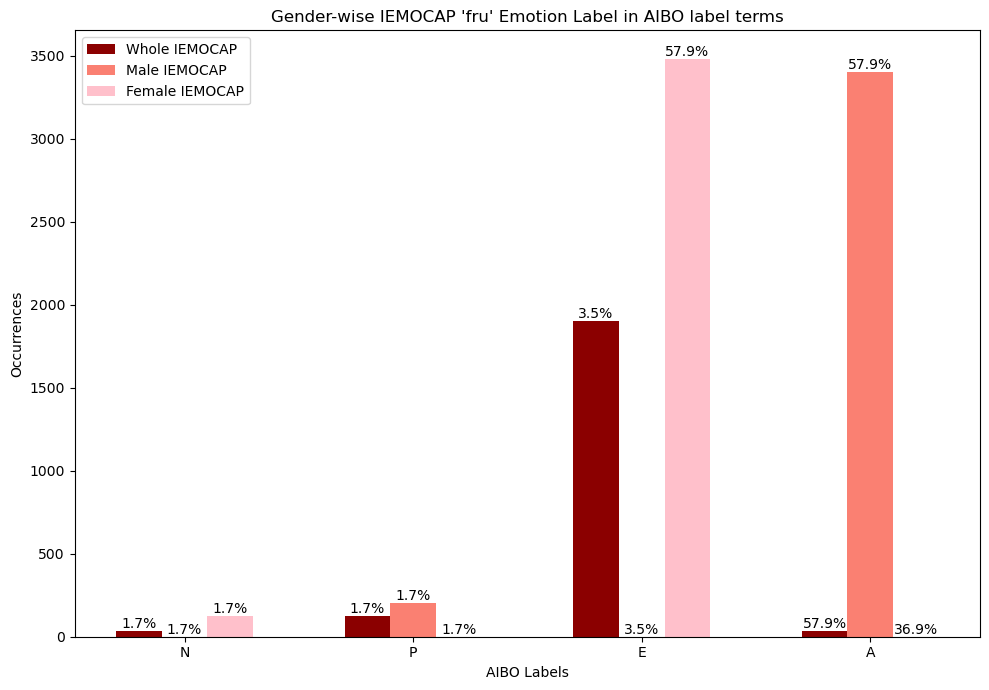

  Label  Whole IEMOCAP Count  Male IEMOCAP Count  Female IEMOCAP Count  \
0     N                   32                   0                   123   
1     P                  127                 203                     0   
2     E                 1902                   0                  3478   
3     A                   36                3398                     0   

   Percentage  
0    1.666846  
1    3.548769  
2   57.855683  
3   36.928702  


In [68]:
emotion = 'fru'
table_df = plot_emotion_mapping_combined(df, df_ml, df_fml, emotion)

csv_file_path = f'results/emotion_mapping_{emotion}.csv'
table_df.to_csv(csv_file_path, index=False)

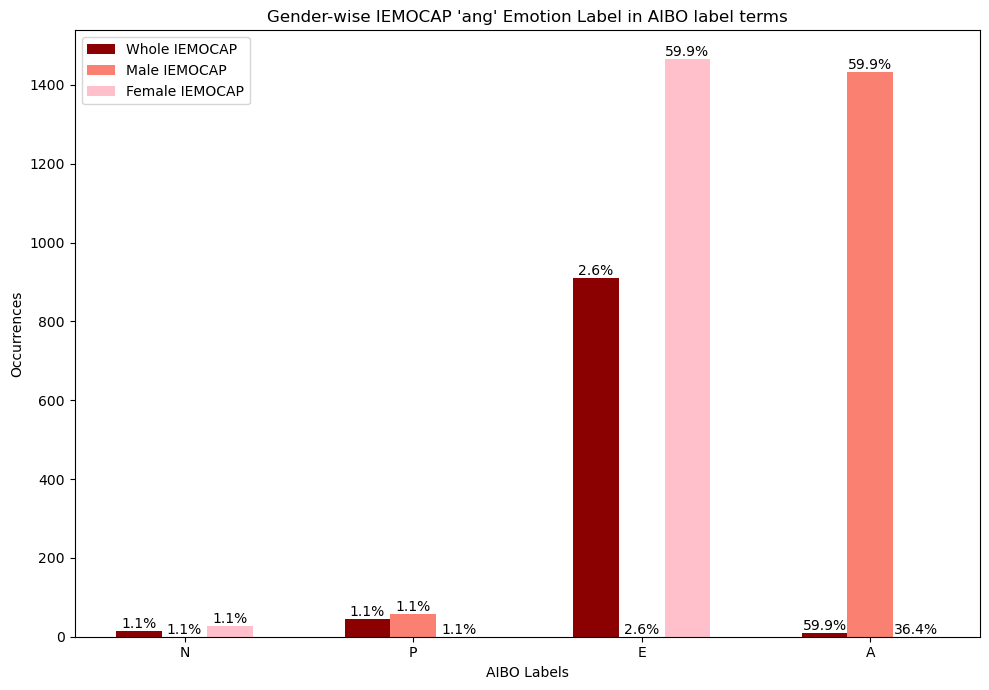

  Label  Whole IEMOCAP Count  Male IEMOCAP Count  Female IEMOCAP Count  \
0     N                   15                   0                    27   
1     P                   46                  58                     0   
2     E                  910                   0                  1465   
3     A                   10                1433                     0   

   Percentage  
0    1.059536  
1    2.623613  
2   59.914228  
3   36.402624  


In [69]:
emotion = 'ang'
table_df = plot_emotion_mapping_combined(df, df_ml, df_fml, emotion)

csv_file_path = f'results/emotion_mapping_{emotion}.csv'
table_df.to_csv(csv_file_path, index=False)

In [73]:
import os
import boto3
from botocore.exceptions import NoCredentialsError, ClientError


def file_exists_in_s3(bucket_name, s3_path):
    s3 = boto3.client('s3')
    try:
        s3.head_object(Bucket=bucket_name, Key=s3_path)
        return True
    except ClientError as e:
        if e.response['Error']['Code'] == '404':
            return False
        else:
            raise

def upload_to_s3(local_path, bucket_name, s3_path):
    s3 = boto3.client('s3')
    try:
        if file_exists_in_s3(bucket_name, s3_path):
            print(f"File already exists: s3://{bucket_name}/{s3_path}")
            return True
        
        s3.upload_file(local_path, bucket_name, s3_path)
        
        # Verify the upload
        s3_object = s3.head_object(Bucket=bucket_name, Key=s3_path)
        s3_size = s3_object['ContentLength']
        local_size = os.path.getsize(local_path)
        
        if s3_size == local_size:
            return True
        else:
            print(f"Size mismatch for {local_path} and s3://{bucket_name}/{s3_path}")
            return False
    except NoCredentialsError:
        print("Credentials not available")
        return False
    except Exception as e:
        print(f"Failed to upload {local_path} to s3://{bucket_name}/{s3_path}: {str(e)}")
        return False

def upload_features_to_s3(local_dir, bucket_name):
    #local_save_path = os.path.join(local_dir)
    
    all_files_uploaded = True
    
    for root, _, files in os.walk(local_dir):
        for file in files:
            #if file.endswith('.pkl'):
            local_file_path = os.path.join(root, file)
            s3_file_path = file
            if upload_to_s3(local_file_path, bucket_name, s3_file_path):
                print(f"Successfully uploaded and verified {local_file_path} to s3://{bucket_name}/{s3_file_path}")
            else:
                all_files_uploaded = False
                print(f"Failed to verify {local_file_path} to s3://{bucket_name}/{s3_file_path}")
    
    if all_files_uploaded:
        print("All files uploaded and verified successfully.")
    else:
        print("Some files failed to upload or verify.")

In [74]:
mfcc_bucket_name = 'ser-results'

In [75]:
upload_features_to_s3('baseline_results', mfcc_bucket_name)

Successfully uploaded and verified baseline_results/losses_cnn_aibo_mfcc.svg to s3://ser-results/losses_cnn_aibo_mfcc.svg
Successfully uploaded and verified baseline_results/losses_cnn_iemocap_mfcc.svg to s3://ser-results/losses_cnn_iemocap_mfcc.svg
Successfully uploaded and verified baseline_results/losses_gru_iemocap_mfcc.svg to s3://ser-results/losses_gru_iemocap_mfcc.svg
Successfully uploaded and verified baseline_results/experiment_results.csv to s3://ser-results/experiment_results.csv
Successfully uploaded and verified baseline_results/losses_gru_aibo_mfcc.svg to s3://ser-results/losses_gru_aibo_mfcc.svg
Successfully uploaded and verified baseline_results/losses_gru_aibo_mspc.svg to s3://ser-results/losses_gru_aibo_mspc.svg
Successfully uploaded and verified baseline_results/losses_gru_iemocap_mspc.svg to s3://ser-results/losses_gru_iemocap_mspc.svg
Successfully uploaded and verified baseline_results/losses_cnn_aibo_mspc.svg to s3://ser-results/losses_cnn_aibo_mspc.svg
Successful

In [76]:
upload_features_to_s3('results', mfcc_bucket_name)

Successfully uploaded and verified results/3-layer_MLP_losses.png to s3://ser-results/3-layer_MLP_losses.png
Successfully uploaded and verified results/report_icp_to_aibo.txt to s3://ser-results/report_icp_to_aibo.txt
Successfully uploaded and verified results/conf_matrix_icp_to_aibo.png to s3://ser-results/conf_matrix_icp_to_aibo.png
Successfully uploaded and verified results/1-layer_MLP_losses.png to s3://ser-results/1-layer_MLP_losses.png
Successfully uploaded and verified results/conf_matrix_None.png to s3://ser-results/conf_matrix_None.png
Successfully uploaded and verified results/report_icp_to_aibo_one_l.txt to s3://ser-results/report_icp_to_aibo_one_l.txt
Successfully uploaded and verified results/conf_matrix_icp_to_aibo_one_l.png to s3://ser-results/conf_matrix_icp_to_aibo_one_l.png
Successfully uploaded and verified results/one_layer_pred.npy to s3://ser-results/one_layer_pred.npy
Successfully uploaded and verified results/three_layer_pred.npy to s3://ser-results/three_layer_